##  <center>The Relationship Between Money and Success Among Major League Baseball Teams</center>
<center> by John Frank, PhD</center>



#### My goal in this project is to better understand the role of money in baseball. Although there are many other factors that may contribute to the success of a team, I decided to focus on whether wealth and the ability to spend more money on player salaries confers any advantage to a franchise.

The following question will guide my exploration of the “Teams” and “Salaries” datasets from Lahman’s Baseball Database:

>Do teams that spend more money on player salaries (relative to other teams) have a higher ratio of wins?

This question comes from a desire to determine whether the ability to spend money on player salaries is associated with an increased likelihood of winning. If true, an imbalance in wealth and spending may create an advantage for wealthy teams.

**Step 1) Define and create the variables of interest.**

>a. The dependent variable for this analysis is **ratio of wins in each year**. This is calculated by dividing the number of wins in a year by the total number of games played for each team. 

>b. The independent variable is **money spent on player salaries by a team in a given year (relative to money spent by other teams that year)**. This variable is created by finding the sum of players’ salaries for each team in each year and then standardizing those values. The values are standardized to determine how much was spent for a given team relative to the average amount spent per team that year.

>c. Of note, both of the dataframes that contain these variables were screened for missing data. Neither dataframe had missing values. 

In [1]:
#DEPENDENT VARIABLE CREATION

#Importing Packages
import pandas as pd
import numpy as np

#Create list of variables that won't be included in analyses
dropped_vars = ['Rank','lgID','franchID','divID','Ghome','DivWin','WCWin','LgWin','WSWin',
                'R','AB','H','2B','3B','HR','BB','SO','SB','CS','HBP','SF','RA','ER','ERA','CG','SHO',
                'SV', 'IPouts','HA','HRA','BBA','SOA','E','DP','FP','name','park','attendance','BPF','PPF','teamIDBR','teamIDlahman45','teamIDretro']
#Creating dataframe from 'Teams.csv' dataset
win_data = pd.read_csv('Teams.csv')

#Create variable that is uniquely associated with each team for a given year
win_data['team_year'] = win_data['teamID']+'_'+win_data['yearID'].astype(str)

#Creating dependent variable 'win_ratio' and adding to grouped dataframe
win_data['win_ratio']= win_data['W']/(win_data['G'])

#Exclude unnecessary variables
win_data.drop(dropped_vars, axis=1, inplace=True)

In [2]:
#Counts the number of missing values in the win_data dataframe
pd.isnull(win_data).values.ravel().sum()

0

In [3]:
#INDEPENDENT VARIABLE CREATION

#Creating dataframe from 'Salaries.csv' dataset
salary_data = pd.read_csv('Salaries.csv')

#Create variable that is uniquely associated with each team for each year
salary_data['team_year'] = salary_data['teamID']+'_'+salary_data['yearID'].astype(str)

#New dataframe 'grouped_salary' is created that is grouped by 'team_year' variable
salary_grouped =  salary_data.groupby(['team_year'], as_index=False)

#New dataframe 'salary_sums_by_teamyear' is created that includes the sum of salaries for each team in each year
salary_sums_by_teamyear = salary_grouped.agg({'yearID':'mean','salary': 'sum'})


#Define the method for standardizing values. DDOF is set to '0' because we are working with the entire population of major league teams.
def standardize(data):
    mean = data.mean()
    std = data.std(ddof=0)
    return (data-mean)/std

#Create standardized salary scores for each team in a given year based on the average salary in that year
salary_sums_by_teamyear['standardized_salary_by_year'] = salary_sums_by_teamyear.groupby('yearID')['salary'].apply(standardize)

In [4]:
#Counts the number of missing values in the salary_sums_by_teamyear dataframe
pd.isnull(salary_sums_by_teamyear).values.ravel().sum()

0

**Step 2) Merge the dataframes that include the independent and dependent variables.**

> To analyze the independent and dependent variables concurrently, it is helpful to have them exist in the same dataframe. To accomplish this, I will perform a function that merges the separate dataframes and match them on the unique variable I created for each team in each year (e.g., 'NYA_2006' for the New York Yankees 2006 team).

In [5]:
#Merge the datasets for the dependent and independent variable. 
#Matched on 'team_year' variable. 
#Only teams with data from both variables in a given year are inlcuded.
wins_salary_merged = pd.merge(win_data,salary_sums_by_teamyear, on = 'team_year', how = 'inner')

**Step 3) Describe the data.**

Before addressing the main research question, it is important to describe the data and examine the distribution of the variables of interest.

>**The Sample**
>>Salaries and win ratios are included for 35 teams from 1985 to 2016. In total, there are 903 unique team/year combinations.

>**Dependent Variable - Win Ratio** 

>>![Win Ratio Distribution](files/win_ratio_dist2.png)
>><center>Mean = 0.50; STD = 0.07; Min = 0.27; Max = 0.72</center>

>>As you can see from the graph above, the win ratios appear to be normally distributed with most ratios falling between .45 and .55. The mean ratio of games won was .50 (won 50% of games played), and most teams (68%) had win rates that falled between .43 and .57. The descriptive statistics also demonstrate that the worst team of any year included in the data only won 27% of their games, while the best team of any year won 72%.

>**Indenpendent Variable - Salary**

>>![Standardized Salary Distribution](files/salary_dist2.png)
>><center>Mean = 0.00; STD = 1.00; Min = -2.54, Max = 4.03</center>

>>The graph for money spent on player salaries (standardized by year) indicates that the distribution has a positive skew. There is one team that spent over three standard deviations above the mean on player salaries for seven years in a row (the New York Yankees between 2004 and 2010), and the high values for this team pull the distribution to the right. As would be expected for a set of standardized values, most teams (68%) had salary scores that were between -1 and 1 standard deviations from the mean for the year in which the salary was reported.

          yearID_x           G           W           L   win_ratio  \
count   907.000000  907.000000  907.000000  907.000000  907.000000   
mean   2000.796031  159.907387   79.889746   79.972437    0.499590   
std       9.038748    8.725152   11.850288   11.826669    0.068708   
min    1985.000000  112.000000   43.000000   40.000000    0.265432   
25%    1993.000000  162.000000   71.000000   72.000000    0.450617   
50%    2001.000000  162.000000   80.000000   79.000000    0.500000   
75%    2009.000000  162.000000   89.000000   89.000000    0.549383   
max    2016.000000  164.000000  116.000000  119.000000    0.716049   

          yearID_y        salary  standardized_salary_by_year  
count   907.000000  9.070000e+02                   907.000000  
mean   2000.796031  5.901535e+07                    -0.005222  
std       9.038748  4.223978e+07                     0.999261  
min    1985.000000  8.800000e+05                    -2.544959  
25%    1993.000000  2.476007e+07                 

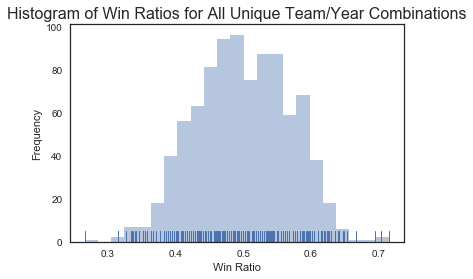

In [6]:
#Provides descriptive statistics for all variables of interest
print(wins_salary_merged.describe())

#Provides the minimum and maximum salarys for the entire dataset
print(wins_salary_merged['salary'].min())
print(wins_salary_merged['salary'].max())

#Determines the number of unique teams are included in the dataset.
unique_teams = set()
for team in list(wins_salary_merged['teamID']):
    unique_teams.add(team)
print(len(unique_teams))
        
#Importing seaborn and matplotlib to help with creating plots
import seaborn as sns; sns.set(style="white", color_codes=True)
import matplotlib.pyplot as plt

#This line ensures that plots are generated within the notebook
%matplotlib inline

#Generates a histogram of 'win ratios' for entire dataframe
ax = plt.axes()
sns.distplot(wins_salary_merged['win_ratio'], kde=False, rug=True)
ax.set_ylabel('Frequency')
ax.set_xlabel('Win Ratio')
ax.set_title('Histogram of Win Ratios for All Unique Team/Year Combinations', fontsize = 16)
plt.show()


Axes(0.125,0.125;0.775x0.755)


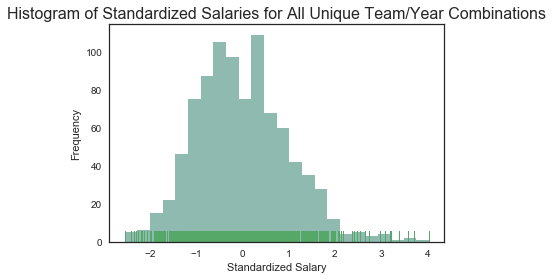

NYA_2004
NYA_2005
NYA_2006
NYA_2007
NYA_2008
NYA_2009
NYA_2010


In [7]:
#Generates a histogram of 'standarized salaries' for entire dataframe
print(sns.distplot(wins_salary_merged['standardized_salary_by_year'], kde=False, rug=True))

ax = plt.axes()
sns.distplot(wins_salary_merged['standardized_salary_by_year'], kde=False, rug=True)
ax.set_ylabel('Frequency')
ax.set_xlabel('Standardized Salary')
ax.set_title('Histogram of Standardized Salaries for All Unique Team/Year Combinations', fontsize = 16)
plt.show()
#Generates a list of teams whose spent over three standard deviations above the mean for their year
for index, row in wins_salary_merged.iterrows():
    if row['standardized_salary_by_year']> 3:
        print(row['team_year'])

#### Step 4) Explore the cross-sectional relationship.
> To better understand the relationship between money and success in baseball, I plotted the graph below with standardized salaries on the x-axis and win ratios on the y-axis. The graph depicts a positive, linear relationship between these two variables. Spending more money on player salaries (relative to other teams in a given year) is associated with a higher ratio of wins for that year. The Pearson product-moment correlation coeefficient of 0.36 indicates that the relationship between these variables is moderate.

>>![Scatterplot of Salaries and Win Ratios](files/0_2.png)

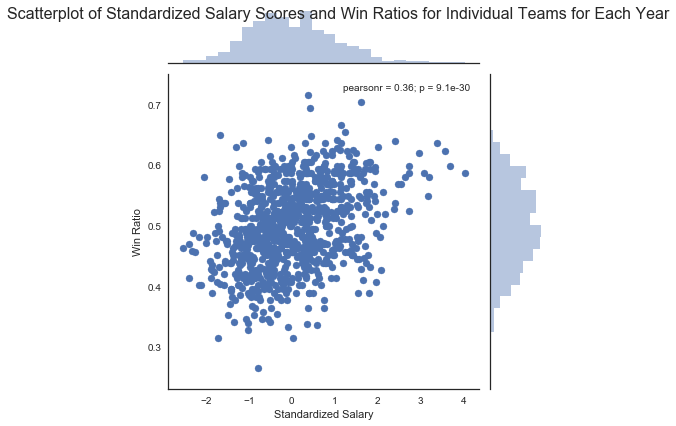

In [8]:
#Generates a scatter plot of the relationship between standardized salary and win ratio
import numpy as np, pandas as pd; np.random.seed(0)
import seaborn as sns; sns.set(style="white", color_codes=True)
%matplotlib inline


b = sns.jointplot(x="standardized_salary_by_year", y="win_ratio", data= wins_salary_merged)
b.ax_joint.set_ylabel('Win Ratio')
b.ax_joint.set_xlabel('Standardized Salary')
b.fig.suptitle('Scatterplot of Standardized Salary Scores and Win Ratios for Individual Teams for Each Year', fontsize = 16)
plt.show()

In [9]:
#Imports functions that allow images to be plotted as a table in markdown cells
from IPython.display import HTML, display

#### Step 5) Conduct follow-up analyses.
> The exploration described above in **Step 4** indicates that a moderate, positive relationship exists between the relative amount spent on salaries by a team in a given year and the ratio of games won that year. However, this correlation does not necessarily mean that being able to spend more on player salaries causes a team to win more games. Among other potential alternative explanations, it may be that winning teams earn more money and, thus, pay their players better. 

> To help determine whether success follows or precedes high spending, I explored how this relationship varies when the standardized salary of a team in a given year is compared to win ratios from past and furture years for that team. The graphs below display the relationship between standardized salary scores and lagged win ratios (from three years preceding the referent year to three years following the referent year). 

>>Note: in creating the variables necessary to explore win ratios from past and future seasons, data that predates or postdates the original dataset is not available and led to missing win ratios for some referent years. The number of missing values for each newly created variable is listed below. When generating scatterplots and correlation coefficients, case with any missing data were dropped analyses. 

>>> **Number of Missing Values per Variable**

>>>*Win Ratio from 3 Years Ago:* 105 missing values

>>>*Win Ratio from 2 Years Ago:* 70 missing values

>>>*Win Ratio from 1 Year Ago:* 35 missing values

>>>*Win Ratio from 1 Year in the Future:* 35 missing values

>>>*Win Ratio from 2 Year in the Future:* 70 missing values

>>>*Win Ratio from 3 Years in the Future:* 105 missing values


><table><tr><td> <center>**Salary vs. Win Ratio From 3 Years Ago**</center><img src="files/-3_2.png" alt="Drawing" style="width: 300px;"/> </td><td><center>**Salary vs. Win Ratio From 2 Years Ago**</center> <img src="files/-2_2.png" alt="Drawing" style="width: 300px;"/></td><td> <center>** Salary vs. Win Ratio From 1 Year Ago**</center><img src="files/-1_2.png" alt="Drawing" style="width: 300px;"/></td></tr><tr><td><center>**Salary vs. Win Ratio From 1 Year in Future**</center> <img src="files/1_2.png" alt="Drawing" style="width: 300px;"/> </td><td><center>**Salary vs. Win Ratio From 2 Years in Future**</center> <img src="files/2_2.png" alt="Drawing" style="width: 300px;"/></td><td> <center>**Salary vs. Win Ratio From 3 Years in Future**</center><img src="files/3_2.png" alt="Drawing" style="width: 300px;"/></td></tr><tr><center>**Scatterplots of Stanardized Salaries and Win Ratios with Varying Lags**</center></tr></table>







> The graphs above illustrate that the relative amount of money spent by a team in a given season is more strongly associated with past success than future success. The Pearson product-moment correlation coefficients were all above .4 when the win ratio came from a year prior to the referent year,  and the correlation coeffcients were below .25 when the win ratio came from a year following the referent year. The graphs and correlation coefficients also indicate that, in both directions, the relationship between money spent on salaries and wins ratios diminishes as the year from which the win ratio comes gets further away from the referant year. For instance, the win ratio from one year prior is more indicative of current spending than the win ratio from two or three years prior. 

In [10]:
#Creates a function that identifies the win ratio for a given team during a given year
def find_win_ratio(year,team):
    for index,row in wins_salary_merged.iterrows():
        if (row['yearID_x'] == year) & (row['teamID'] == team):
            return row['win_ratio']

In [11]:
#Creates a function that creates a lagged win ratio variable. Arguments are dataframe and how long the lag should be
def lagged_win_ratio(df, lag):
    for index, row in df.iterrows():
        year = row['yearID_x']+ lag
        team = "'"+row['teamID']+"'"
        lag_str = str(lag)
        df.loc[index, lag_str + '_year_lag'] = find_win_ratio(year, row['teamID'])
    return df

#Runs the lag function to create lagged win ratios for up to three years before and three years after the referent year
for i in range(-3,4):
    lagged_win_ratio(wins_salary_merged,i)

In [12]:
#Runs descriptive statistics for the dataset with newly created variables to provide counts for each variable
wins_salary_merged.describe()

,yearID_x,G,W,L,win_ratio,yearID_y,salary,standardized_salary_by_year,-3_year_lag,-2_year_lag,-1_year_lag,0_year_lag,1_year_lag,2_year_lag,3_year_lag
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,9.070000e+02,907.000000,802.000000,837.000000,872.000000,907.000000,872.000000,837.000000,802.000000
mean,2000.796031,159.907387,79.889746,79.972437,0.499590,2000.796031,5.901535e+07,-0.005222,0.499969,0.499792,0.499546,0.499590,0.500063,0.500320,0.500531
std,9.038748,8.725152,11.850288,11.826669,0.068708,9.038748,4.223978e+07,0.999261,0.069629,0.069400,0.068900,0.068708,0.068362,0.068510,0.068942
min,1985.000000,112.000000,43.000000,40.000000,0.265432,1985.000000,8.800000e+05,-2.544959,0.265432,0.265432,0.265432,0.265432,0.265432,0.265432,0.265432
25%,1993.000000,162.000000,71.000000,72.000000,0.450617,1993.000000,2.476007e+07,-0.722722,0.450617,0.450617,0.450617,0.450617,0.450617,0.450617,0.450617
50%,2001.000000,162.000000,80.000000,79.000000,0.500000,2001.000000,4.976818e+07,-0.087846,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,2009.000000,162.000000,89.000000,89.000000,0.549383,2009.000000,8.293931e+07,0.622716,0.551456,0.549383,0.549383,0.549383,0.549383,0.549383,0.549383
max,2016.000000,164.000000,116.000000,119.000000,0.716049,2016.000000,2.319789e+08,4.028220,0.716049,0.716049,0.716049,0.716049,0.716049,0.716049,0.716049


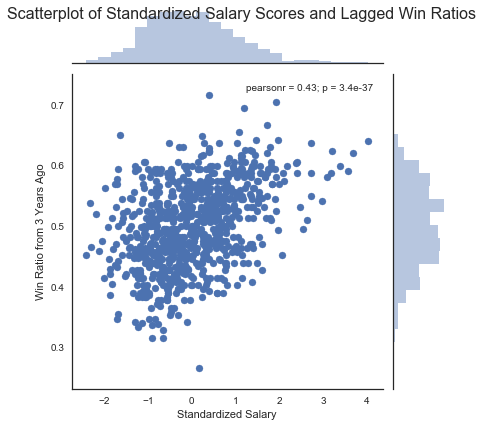

In [19]:
#The following six cells create scatter plots depicting the relationships between standarized salary and lagged win ratios
import numpy as np, pandas as pd; np.random.seed(0)
import seaborn as sns; sns.set(style="white", color_codes=True)
%matplotlib inline

b = sns.jointplot(x="standardized_salary_by_year", y="-3_year_lag", data= wins_salary_merged)
b.ax_joint.set_ylabel('Win Ratio from 3 Years Ago')
b.ax_joint.set_xlabel('Standardized Salary')
b.fig.suptitle('Scatterplot of Standardized Salary Scores and Lagged Win Ratios', fontsize = 16)
plt.show()

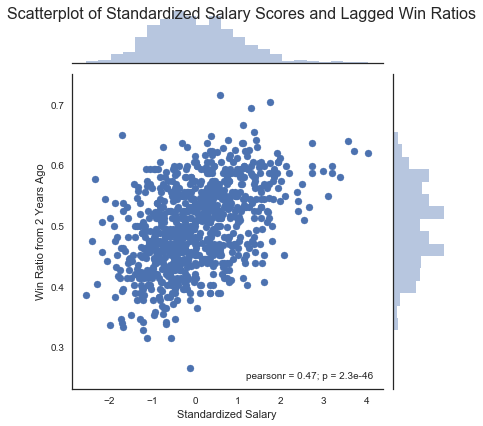

In [20]:
%matplotlib inline

b = sns.jointplot(x="standardized_salary_by_year", y="-2_year_lag", data= wins_salary_merged)
b.ax_joint.set_ylabel('Win Ratio from 2 Years Ago')
b.ax_joint.set_xlabel('Standardized Salary')
b.fig.suptitle('Scatterplot of Standardized Salary Scores and Lagged Win Ratios', fontsize = 16)
plt.show()

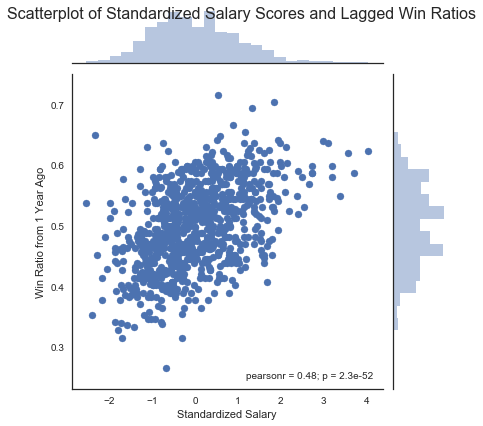

In [21]:
%matplotlib inline

b = sns.jointplot(x="standardized_salary_by_year", y="-1_year_lag", data= wins_salary_merged)
b.ax_joint.set_ylabel('Win Ratio from 1 Year Ago')
b.ax_joint.set_xlabel('Standardized Salary')
b.fig.suptitle('Scatterplot of Standardized Salary Scores and Lagged Win Ratios', fontsize = 16)
plt.show()

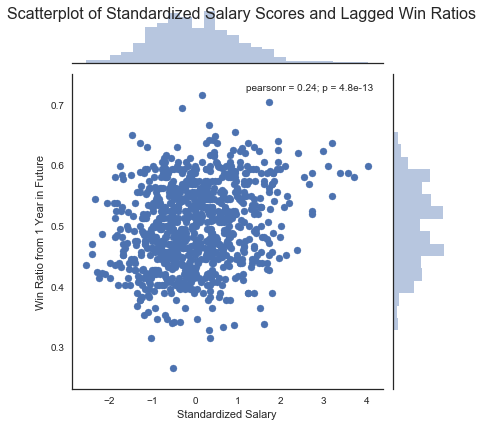

In [22]:
%matplotlib inline

b = sns.jointplot(x="standardized_salary_by_year", y="1_year_lag", data= wins_salary_merged)
b.ax_joint.set_ylabel('Win Ratio from 1 Year in Future')
b.ax_joint.set_xlabel('Standardized Salary')
b.fig.suptitle('Scatterplot of Standardized Salary Scores and Lagged Win Ratios', fontsize = 16)
plt.show()

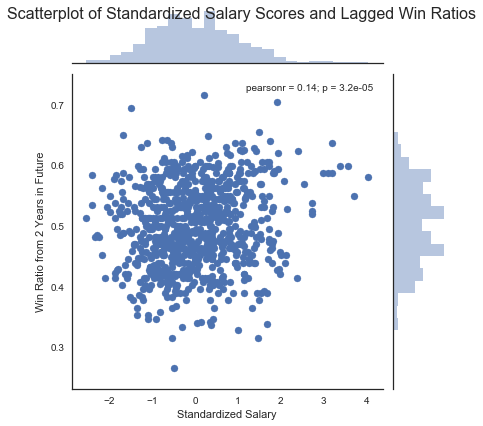

In [23]:
%matplotlib inline

b = sns.jointplot(x="standardized_salary_by_year", y="2_year_lag", data= wins_salary_merged)
b.ax_joint.set_ylabel('Win Ratio from 2 Years in Future')
b.ax_joint.set_xlabel('Standardized Salary')
b.fig.suptitle('Scatterplot of Standardized Salary Scores and Lagged Win Ratios', fontsize = 16)
plt.show()

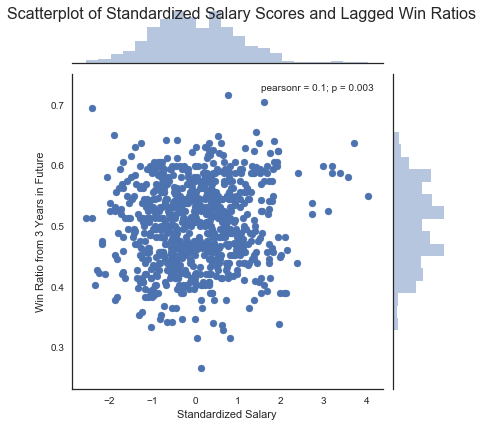

In [24]:
%matplotlib inline

b = sns.jointplot(x="standardized_salary_by_year", y="3_year_lag", data= wins_salary_merged)
b.ax_joint.set_ylabel('Win Ratio from 3 Years in Future')
b.ax_joint.set_xlabel('Standardized Salary')
b.fig.suptitle('Scatterplot of Standardized Salary Scores and Lagged Win Ratios', fontsize = 16)
plt.show()

#### Step 6) Draw conclusions.
> Money spent by a Major League baseball team is related to that team's success. However, the relationship is not as straightforward as I anticipated. I originally expected that teams which spend more money on player salaries would have better players and, thus, win more games. Although there was a mild association between spending and future success, the money teams spent on salaries was more closely associated with past success. These findings suggest that teams that performed well in one year had a greater likelihood of spending more on player salaries in the following year compared to teams that did not perform as well. 

>The relationship between money spent on player salaries and past success may occur because winning teams generate more income which can be spent on player salaries in the following year. It may also be that the players on winning teams get higher raises between seasons, leading teams to spend more on salaries in the year follow a winning season. 

>The mild association between player salaries and success in current and future years may be attributed to the past success of a high spending team. In other words, teams that play better in one year will both spend more money in the next year and continue playing better than other teams. A bidirectional relationship may also exist in which teams that win more games may be able to spend more on salaries, and this may confer some advantage in future seasons. 

#### Step 7) Discus Limitations.

>The analyses were limited by the variables included in the Lahman database. Money spent on player salaries had to be used as a proxy for team wealth and spending because this was the money-related variable in the datasets. It is possible that money may be used in other ways to confer an advantage on teams (e.g., facilities, training camps, equipment) that were not captured in the current analyses. Additionaly, win ratio may not be the best indicator of a teams success. A future analysis could explore the relationship between salary spending and World Series victories. As noted above, the analyses were constrained to the time frame of the dataset and do not include data from years beyond the range of the dataset. 

>The current analyses are not able to control for the influence of possible confounding variables. A variable like fan enthusiasm may have a non-random impact on both the wealth of the franchise and the morale and playing (and potentially ability to win games) of the team. We are not able to control for variables like this with the current data.

>The current analyses do not address the possible bidirectional influence of money spent on player salaries and the success of a team. More sophisticated longitudinal analyses are also required to control for this possibility.

>As such, the results are tentative and do not providence sufficient evidence for causal relationships between these variables. 

### Resources


>"Seaborn Tutorial" http://seaborn.pydata.org/tutorial.html

>"Stack Overflow" https://stackoverflow.com

>"Matplotlib Documentation" https://matplotlib.org